<a href="https://colab.research.google.com/github/saincoder404/Basic_Python_Course/blob/master/Lecture_22_Deep_learning_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Installation***

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

***Loading required packages and data***

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

***Preprocessing***

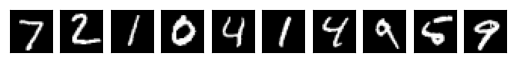

In [4]:
import matplotlib.pyplot as plt
n = 10 #How many digits we will display

for i in range(n):
#display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

In [5]:
print("Previous x_train shape: {} \nPrevious Y_train shape: {}".format(X_train.shape, Y_train.shape))

X_train = X_train.reshape(60000, 784)
X_test= X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test= X_test.astype('float32')

X_train /=255
X_test /=255

classes = 10

Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

print("New X_train shape: {} \nNew Y_train shape: {}".format(X_train.shape, Y_train.shape))

Previous x_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,)
New X_train shape: (60000, 784) 
New Y_train shape: (60000, 10)


***Setting up parameters***

In [6]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
classes = 10
epochs = 10

***Building the FCN model***

In [7]:
# building the model
model = Sequential()
model.add(Dense(20, input_dim = input_size, activation = 'relu'))

# output = rule(dot (W, input) + bias)
model.add(Dense(20,activation = 'relu'))
model.add(Dense(classes ,activation = 'softmax'))

# compilation
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Training the model***

In [10]:
# import necessary libraries
from time import time

# Recrd the current time to measure training time
tic = time()

# Fit the model on training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs = epochs, verbose = 1)

# record the model after training time
toc = time()

# calculate and print the time taken of model training
print('Model training took {} secs'.format(toc - tic))

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.9025
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.9057
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.9077
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9097
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3068 - accuracy: 0.9112
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9129
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2962 - accuracy: 0.9137
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2915 - accuracy: 0.9157
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2869 - accuracy: 0.9170
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9180

***Testing the model***


Test Accuracy: 0.9054
1/1 [==============================] - 0s 22ms/step


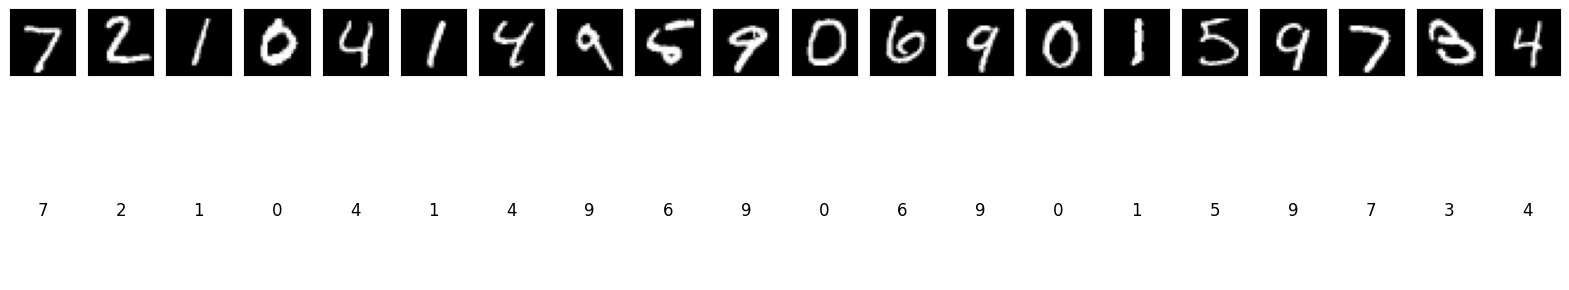

In [11]:
# import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# predict probabilities for the test set using the trained model
y_predict_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_predict_probs > 0.5, 1,0)

# calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest Accuracy: {}".format(test_accuracy))

#Define a mask for selecting a range of indicos(20 to 49)
mask = range(20, 50)

#Select the 20 first sample of test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

#predict the probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

#setup figure to display images
n = len(X_valid)
plt.figure(figsize=(20 ,4))

for i in range(n):
  #Diplay the original image
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display the predicited digits
  predicited_digits = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2, n, i + 1 + n)
  plt.text(0.5, 0.5, str(predicited_digits), fontsize = 12, ha = 'center', va = 'center')
  plt.axis('off')

#Show the plotted image
plt.show()

#close the plotted
plt.close()